# Flight efficiency map

Load packages, load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from cmocean import cm as cmo
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

In [2]:
flights = pd.read_csv("../data/by_route_airline.csv")
flights

,departure,arrival,arrival_longitude,arrival_latitude,departure_longitude,departure_latitude,airlinename,aircraft_types,avg_distance,flown_distance,gcd,flights,passengers,seats,average_load,co2,gco2_pax_km
0,SGN,HAN,105.806999,21.221201,106.652000,10.818800,Vietnam Airlines,5,1261.547796,1.154569e+07,1.063049e+07,9152,1.993998e+06,2447017,0.814869,191365.676340,76.944016
1,HAN,SGN,106.652000,10.818800,105.806999,21.221201,Vietnam Airlines,5,1261.547796,1.092879e+07,1.006249e+07,8663,1.966054e+06,2412725,0.814869,195266.817616,79.051205
2,CJU,GMP,126.791000,37.558300,126.492546,33.512058,Asiana Airlines,5,501.253150,5.223058e+06,4.702058e+06,10420,1.782774e+06,2123733,0.839453,100145.929946,110.904076
3,GMP,CJU,126.492546,33.512058,126.791000,37.558300,Asiana Airlines,5,501.253150,5.105765e+06,4.596465e+06,10186,1.719632e+06,2048514,0.839453,96146.969851,110.549887
4,FUK,HND,139.779999,35.552299,130.451004,33.585899,All Nippon Airways,9,982.357327,8.414873e+06,7.558273e+06,8566,1.708145e+06,2438270,0.700556,161111.234068,98.852367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81839,BOO,OSL,11.100400,60.193901,14.365300,67.269203,Wideroe's Flyveselskap,1,903.632067,9.036321e+02,8.036321e+02,1,2.521278e+01,39,0.646481,3.184374,139.769276
81840,DRW,TCA,134.182999,-19.634399,130.881851,-12.414970,Airnorth Regional,1,977.769135,9.777691e+02,8.777691e+02,1,2.355192e+01,30,0.785064,3.052329,132.546626
81841,TCA,DRW,130.881851,-12.414970,134.182999,-19.634399,Airnorth Regional,1,977.769135,9.777691e+02,8.777691e+02,1,2.355192e+01,30,0.785064,3.052329,132.546626
81842,TJN,PPT,-149.606995,-17.553699,-142.266464,-15.857434,Air Tahiti,1,905.066029,9.050660e+02,8.050660e+02,1,2.111117e+01,30,0.703706,2.493229,130.487717


In [3]:

sample = range(len(flights))                            # all flights or subsample to test?
sample_random = np.random.shuffle(np.copy(sample))      # randomize the order for plotting

Flight paths via great circle distance between departure and arrival airport

In [4]:
latitude_departure = np.array(flights["departure_latitude"])[sample_random]
longitude_departure = np.array(flights["departure_longitude"])[sample_random]

latitude_arrival = np.array(flights["arrival_latitude"])[sample_random]
longitude_arrival = np.array(flights["arrival_longitude"])[sample_random]

Flight carbon intensity in gCO2/pax/km, use flown distance, not great circle distance

In [5]:
intensity = np.array(flights["gco2_pax_km"])[sample_random]

In [6]:
np.percentile(intensity, 5), np.percentile(intensity, 95)

(np.float64(60.959548380832466), np.float64(158.84694155339977))

# Plot the map

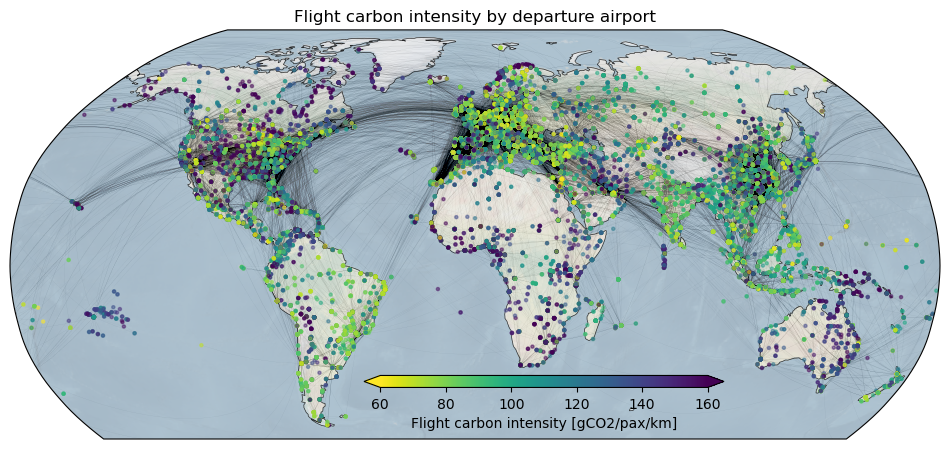

In [21]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
cax = fig.add_axes([0.42, 0.24, 0.3, 0.02])

# ax.set_global()
ax.set_extent([-180, 180, -60, 90])
ax.add_feature(cfeature.OCEAN,facecolor="0.8",zorder=-2)
ax.add_feature(cfeature.LAND,facecolor="0.9", zorder=-1)
# ax.add_feature(cfeature.OCEAN,facecolor="#4381a2",zorder=-2)
# ax.add_feature(cfeature.LAND,facecolor="#63a1c2", zorder=-1)
ax.stock_img(alpha=0.4)
ax.coastlines(color="k", alpha=0.8, lw=0.5, zorder=0)

ax.plot(np.vstack((longitude_departure, longitude_arrival)),
        np.vstack((latitude_departure, latitude_arrival)), color="k", lw=.1, alpha=0.05, transform=ccrs.Geodetic(), zorder=.1)

vmin, vmax = 60, 160
h = ax.scatter(0, 0, 0, 0, vmin=vmin, vmax=vmax, alpha=1, cmap="viridis_r", visible=False)
ax.scatter(longitude_departure, latitude_departure, 5, intensity,
               vmin=vmin, vmax=vmax, alpha=0.5, cmap="viridis_r", transform=ccrs.PlateCarree())

fig.colorbar(h, cax=cax, orientation='horizontal', label="Flight carbon intensity [gCO2/pax/km]", extend="both")

ax.set_title("Flight carbon intensity by departure airport")
plt.show()

Fig. ?: Carbon intensity per flight connection. Thin black lines denote the flight path between two airports along the respective great circle (actual paths include detours, holding, etc.). Departure airports are marked by location and colour-coded to show the carbon intensity, in carbon emissions (gCO2) through fuel burn by aircraft type, per passenger (average load factor for that flight connection), per flown kilometre (accounting for detours or holding).

# Plot only America, Europe, and East Asia

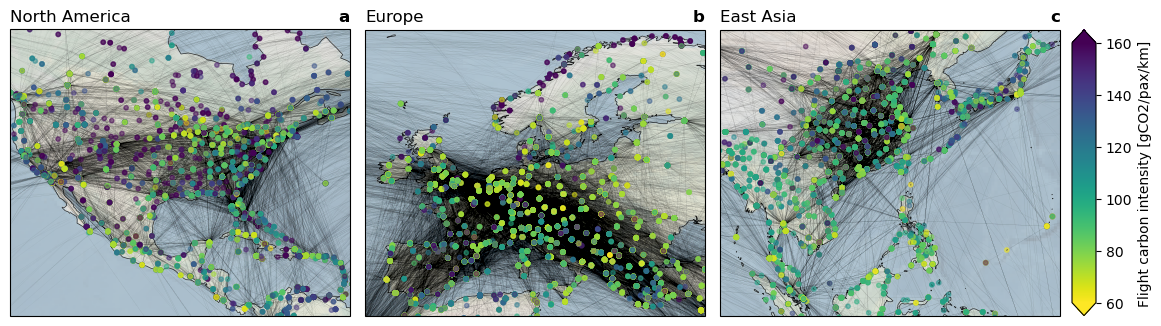

In [20]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree(central_longitude=-100))
ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree(central_longitude=10))
ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree(central_longitude=120))

ax1.set_extent([-125, -60, 7, 58], crs=ccrs.Geodetic())
ax2.set_extent([-12, 33, 34, 70.5], crs=ccrs.Geodetic())
ax3.set_extent([90, 147, -1.5, 43], crs=ccrs.Geodetic())

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

ax1p = ax1.get_position()
x1, y1, _, _ = ax1p.bounds

ax3p = ax3.get_position()
x3, y3, w, h = ax3p.bounds

# cax = fig.add_axes([x1, y1-0.04, x3+w-x1, 0.02])
cax = fig.add_axes([x3+w+0.01, y3, 0.02, h])

for ax in (ax1, ax2, ax3):
    ax.add_feature(cfeature.OCEAN,facecolor="0.8",zorder=-2)
    ax.add_feature(cfeature.LAND,facecolor="0.9", zorder=-1)
    # ax.add_feature(cfeature.OCEAN,facecolor="#4381a2",zorder=-2)
    # ax.add_feature(cfeature.LAND,facecolor="#63a1c2", zorder=-1)
    ax.stock_img(alpha=0.4)
    ax.coastlines(color="k", alpha=0.8, lw=0.5, zorder=0)


vmin, vmax = 60, 160
h = ax1.scatter(0, 0, 0, 0, vmin=vmin, vmax=vmax, alpha=1, cmap="viridis_r", visible=False)

for ax in (ax1, ax2, ax3):
    ax.plot(np.vstack((longitude_departure, longitude_arrival)),
            np.vstack((latitude_departure, latitude_arrival)), color="k", lw=.2, alpha=0.05, transform=ccrs.Geodetic(), zorder=.1)
    ax.scatter(longitude_departure, latitude_departure, 10, intensity,
               vmin=vmin, vmax=vmax, alpha=0.5, cmap="viridis_r", transform=ccrs.PlateCarree())

fig.colorbar(h, cax=cax, orientation='vertical', label="Flight carbon intensity [gCO2/pax/km]", extend="both")

ax1.set_title("North America", loc="left")
ax2.set_title("Europe", loc="left")
ax3.set_title("East Asia", loc="left")

ax1.set_title("a", loc="right", fontweight="bold")
ax2.set_title("b", loc="right", fontweight="bold")
ax3.set_title("c", loc="right", fontweight="bold")

plt.show()

Fig. ?: As Fig. ? but zooming into (a) North America, (b) Europe, (c) East Asia.